In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score
)

In [64]:
file_path = "../content/creditcard.csv"
df = pd.read_csv(file_path)

print(df.shape)
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
# --------------------------------------
# 3. BASIC CHECKS
# --------------------------------------
df.info()
print("Class value counts:\n", df['Class'].value_counts())
print("Missing values:\n", df.isnull().sum())
print("Fraud Ratio:", df['Class'].mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [66]:
print(df.shape)
print(df.info())
print(df.describe())
print(df["Class"].value_counts())
print("Fraud Ratio:", df['Class'].mean())


(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [67]:
col,row = df.shape
col,row

(284807, 31)

In [68]:
# gives fraction of frauds
df['Class'].mean()

np.float64(0.001727485630620034)

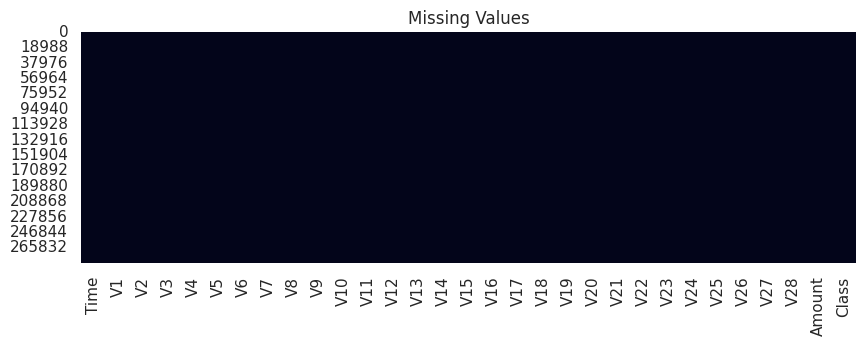

In [69]:
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values")
plt.show()


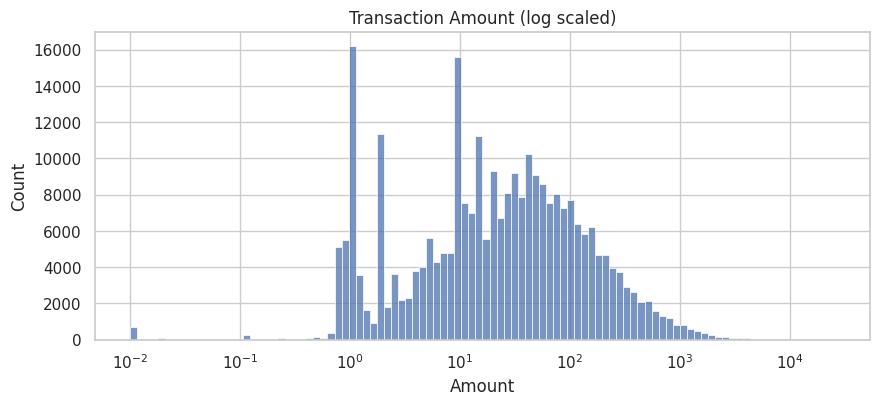

In [70]:
plt.figure(figsize=(10,4))
sns.histplot(df['Amount'], bins=100, log_scale=True)
plt.title('Transaction Amount (log scaled)')
plt.show()


In [71]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


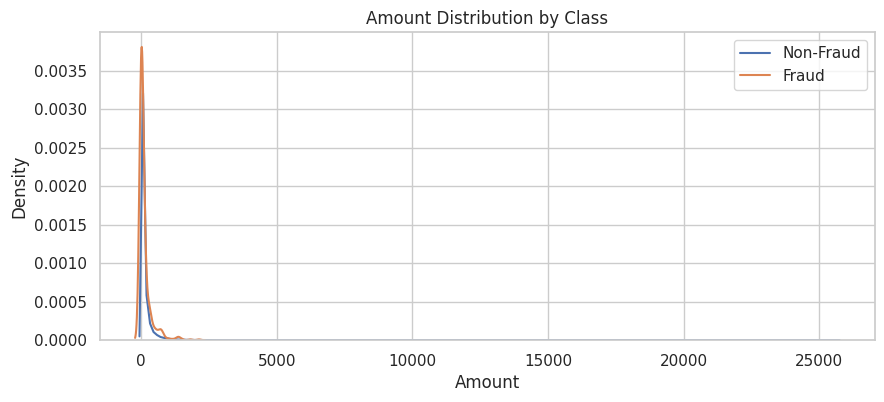

In [72]:
plt.figure(figsize=(10,4))
sns.kdeplot(df[df.Class==0]['Amount'], label='Non-Fraud')
sns.kdeplot(df[df.Class==1]['Amount'], label='Fraud')
plt.legend()
plt.title("Amount Distribution by Class")
plt.show()


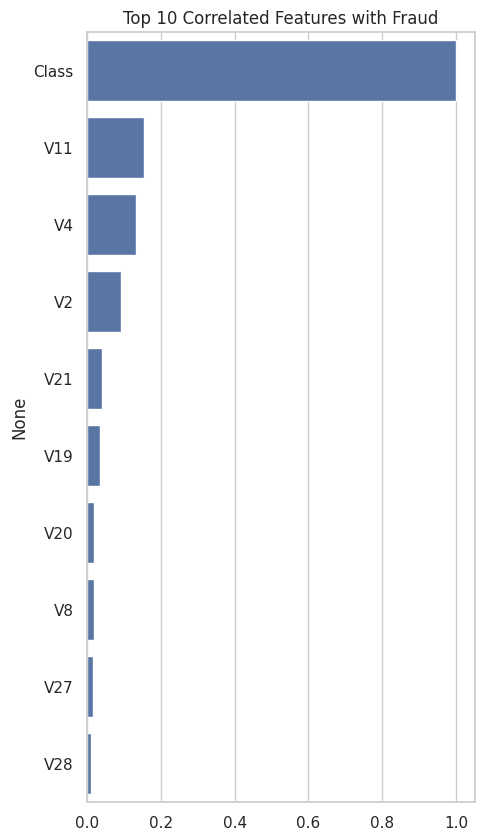

In [73]:
corr = df.corr()['Class'].sort_values(ascending=False)
plt.figure(figsize=(5,10))
sns.barplot(x=corr.values[:10], y=corr.index[:10])
plt.title("Top 10 Correlated Features with Fraud")
plt.show()


In [74]:
scaler = StandardScaler()
df[['Amount_scaled', 'Time_scaled']] = scaler.fit_transform(df[['Amount', 'Time']])
df = df.drop(['Amount','Time'], axis=1)


In [81]:
X = df.drop("Class", axis=1)
y = df["Class"]

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
print("Top 10 Selected Features:", list(selected_features))


Top 10 Selected Features: ['V10', 'V12', 'V14', 'V16', 'V17']


In [82]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

print("Original Shape:", X.shape)
print("PCA Shape:", X_pca.shape)


Original Shape: (284807, 30)
PCA Shape: (284807, 10)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)


In [84]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

pred = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("AUC:", roc_auc_score(y_test, probs))


[[54834  2030]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

AUC: 0.969457918930093


In [86]:
import pickle

# Save model
pickle.dump(model, open("model.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

print("model.pkl and scaler.pkl saved!")


model.pkl and scaler.pkl saved!
